<a href="https://colab.research.google.com/github/E-oyn/ARIMA/blob/main/Holt_Winters_and_Airmiles_Best_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries and Data


In [181]:
%cd  /content/drive/MyDrive/2023/Forecasting Models and Time Series for Business in Python File/3. Holt-Winters

/content/drive/MyDrive/2023/Forecasting Models and Time Series for Business in Python File/3. Holt-Winters


In [182]:
import pandas as pd
import numpy as np

In [183]:
data = pd.read_csv('airmiles.csv',index_col='Date')


In [184]:
data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y")
data.head



<bound method NDFrame.head of             airmiles
Date                
1996-01-01  30983174
1996-02-01  32147663
1996-03-01  38342975
1996-04-01  35969113
1996-05-01  36474391
...              ...
2005-01-01  42760657
2005-02-01  41120838
2005-03-01  52053059
2005-04-01  48152585
2005-05-01  50047901

[113 rows x 1 columns]>

In [185]:
data = data.asfreq("MS")
data.index

DatetimeIndex(['1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01',
               ...
               '2004-08-01', '2004-09-01', '2004-10-01', '2004-11-01',
               '2004-12-01', '2005-01-01', '2005-02-01', '2005-03-01',
               '2005-04-01', '2005-05-01'],
              dtype='datetime64[ns]', name='Date', length=113, freq='MS')

#Data Visuals


<Axes: xlabel='Date'>

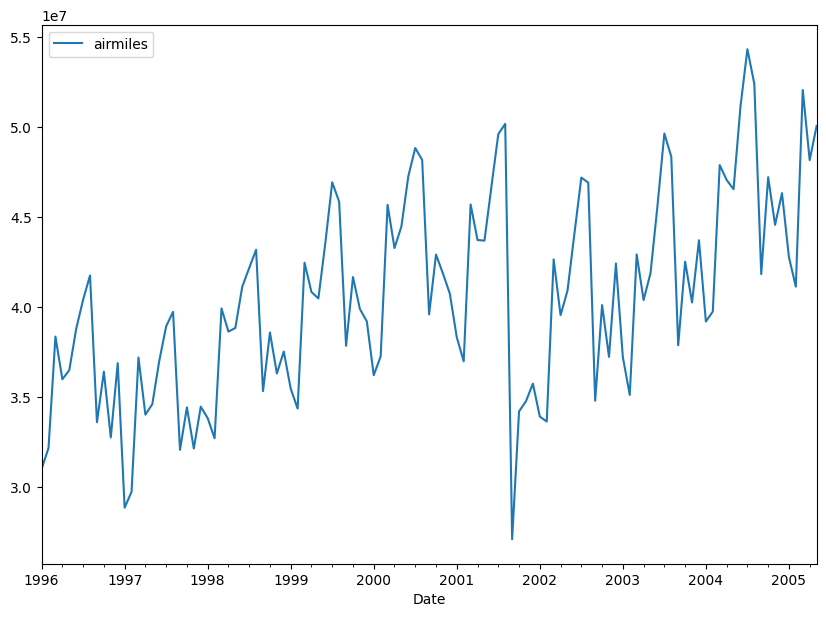

In [186]:
data.plot(figsize= (10,7),legend=True)


In [192]:
from statsmodels.tsa.seasonal import seasonal_decompose


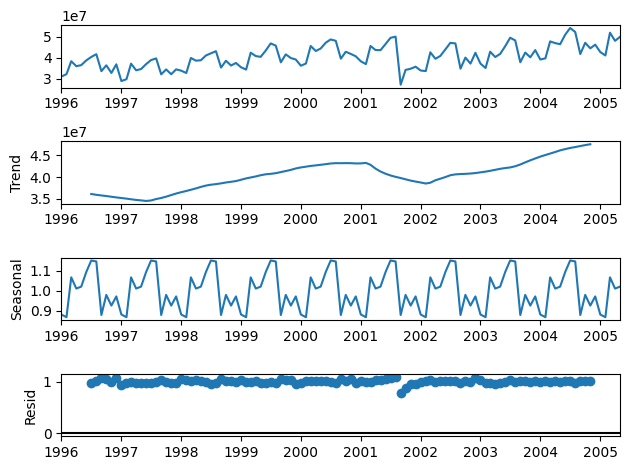

In [193]:
decomposition = seasonal_decompose(x=data,
                                   model = 'multiplicative',period=12)
decomposition.plot();

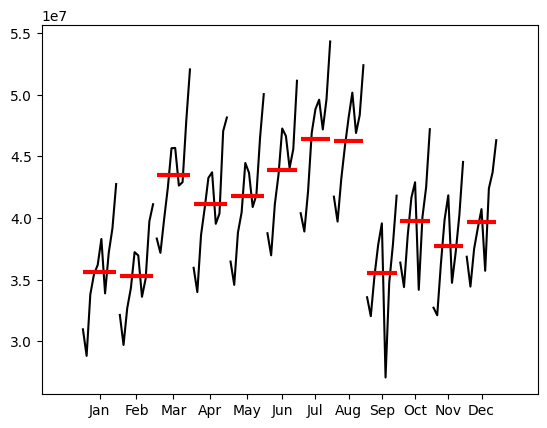

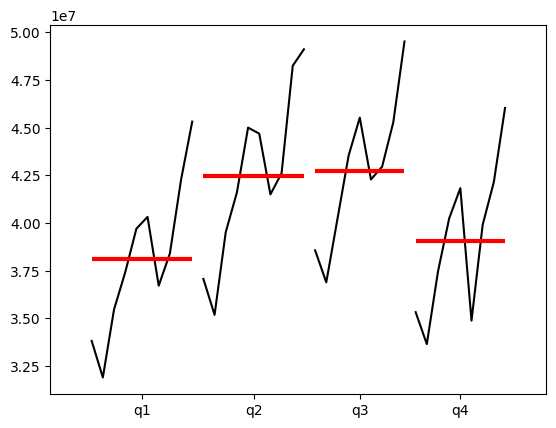

In [196]:
 from statsmodels.graphics.tsaplots import month_plot, quarter_plot
 month_plot(data.resample(rule="MS").mean())
 quarter_plot(data.resample(rule="Q").mean());

#Create Training and Test Data Sets

In [223]:
test_period = 12
training_set = data.iloc[:-test_period,:]
test_set = data.iloc[-test_period:,:]

In [224]:
print(test_set.head(1))
print(training_set.tail(1))

            airmiles
Date                
2004-06-01  51134050
            airmiles
Date                
2004-05-01  46534130


#Holt Winters

In [248]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [254]:
model = ExponentialSmoothing(endog=training_set["airmiles"],
                             trend='add',
                             seasonal='add',
                             seasonal_periods = 12).fit()
model_2 = ExponentialSmoothing(endog=training_set["airmiles"],
                             trend='mul',
                             seasonal='add',
                             seasonal_periods = 12).fit()

model_3 = ExponentialSmoothing(endog=training_set["airmiles"],
                             trend='add',
                             seasonal='mul',
                             seasonal_periods = 12).fit()

model_4 = ExponentialSmoothing(endog=training_set["airmiles"],
                             trend='mul',
                             seasonal='mul',
                             seasonal_periods = 12).fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


#Model

In [250]:
predictions_hw = model.forecast(steps=len(test_set)).rename("HW")
predictions_hw.head()

2004-06-01    4.946702e+07
2004-07-01    5.167300e+07
2004-08-01    5.123395e+07
2004-09-01    4.070714e+07
2004-10-01    4.578311e+07
Freq: MS, Name: HW, dtype: float64

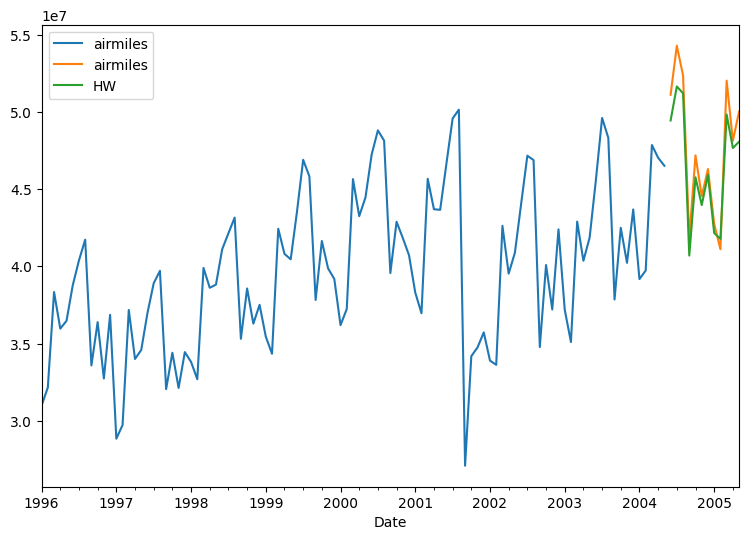

In [251]:
training_set['airmiles'].plot(figsize = (9,6), legend = True)
test_set['airmiles'].plot(legend=True)
predictions_hw.plot(legend = True);

In [252]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(test_set, predictions_hw),0))
print(round(np.sqrt(mean_squared_error(test_set, predictions_hw)),0))

1235753.0
1428833.0


In [253]:
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true))*100
MAPE(test_set,predictions_hw)

9.725928768925694

#Model

Model 1 MAE: 1235752.70
Model 1 RMSE: 1428832.83
Model 1 MAPE: 9.73
Model 2 MAE: 1098498.19
Model 2 RMSE: 1312454.71
Model 2 MAPE: 9.68
Model 3 MAE: 1046933.53
Model 3 RMSE: 1230641.26
Model 3 MAPE: 10.14
Model 4 MAE: 877575.16
Model 4 RMSE: 1075653.07
Model 4 MAPE: 10.10
Best Model Number: 2


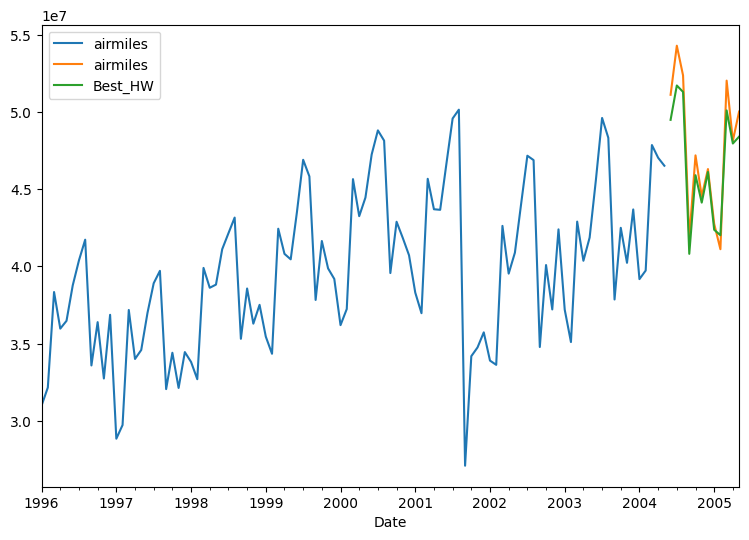

In [294]:
import warnings
warnings.filterwarnings("ignore")

# Define MAPE function
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true))*100

best_model = None
best_mae = float('inf')
best_rmse = float('inf')
best_mape = float('inf')  # Initialize best MAPE
best_model_num = None  # Initialize best model number

for i in range(4):

  model_1 = ExponentialSmoothing(endog=training_set["airmiles"],
                             trend='add',
                             seasonal='add',
                             seasonal_periods = 12).fit()
  model_2 = ExponentialSmoothing(endog=training_set["airmiles"],
                             trend='mul',
                             seasonal='add',
                             seasonal_periods = 12).fit()

  model_3 = ExponentialSmoothing(endog=training_set["airmiles"],
                             trend='add',
                             seasonal='mul',
                             seasonal_periods = 12).fit()

  model_4 = ExponentialSmoothing(endog=training_set["airmiles"],
                             trend='mul',
                             seasonal='mul',
                             seasonal_periods = 12).fit()


  if i == 0:
        model_i = model_1
  elif i == 1:
        model_i = model_2
  elif i == 2:
        model_i = model_3
  elif i == 3:
        model_i = model_4

  predictions_hw_i = model_i.forecast(steps=len(test_set)).rename(f"HW_{i+1}")
  mae = mean_absolute_error(test_set, predictions_hw_i)
  rmse = np.sqrt(mean_squared_error(test_set, predictions_hw_i))
  mape = MAPE(test_set, predictions_hw_i)

  print(f"Model {i+1} MAE: {mae:.2f}")
  print(f"Model {i+1} RMSE: {rmse:.2f}")
  print(f"Model {i+1} MAPE: {mape:.2f}")

  if mae < best_mae and rmse < best_rmse and mape < best_mape:
      best_mae = mae
      best_rmse = rmse
      best_mape = mape
      best_model = model_i
      best_model_num = i + 1

best_predictions_hw = best_model.forecast(steps=len(test_set)).rename("Best_HW")
training_set['airmiles'].plot(figsize = (9,6), legend = True)
test_set['airmiles'].plot(legend=True)
best_predictions_hw.plot(legend = True)
print(f"Best Model Number: {best_model_num}")  # Print best model number

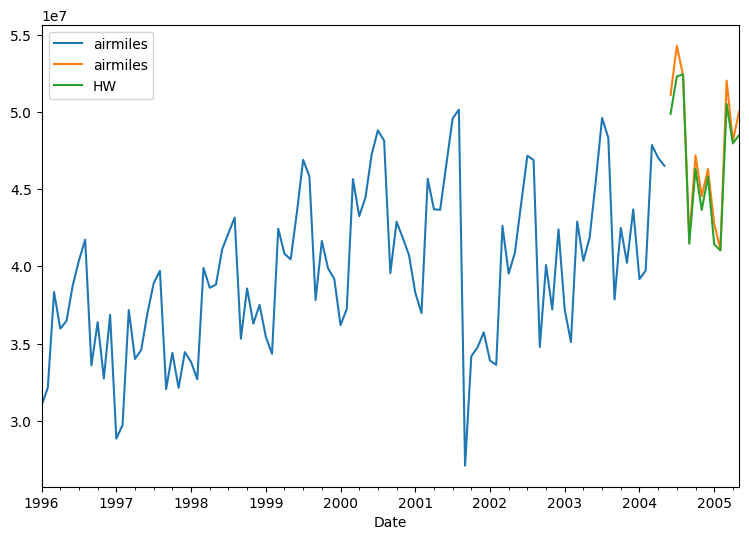

In [292]:
predictions_hw = model_4.forecast(steps=len(test_set)).rename("HW")
training_set['airmiles'].plot(figsize = (9,6), legend = True)
test_set['airmiles'].plot(legend=True)
predictions_hw.plot(legend = True);